In [401]:
%load_ext autoreload
%autoreload 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink
import os
from IPython.display import clear_output, display

%aimport plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [402]:
use_dataset = True
selected_folder = 'Fishyscapes_LaF'
selected_file = '01_Hanns_Klemm_Str_45_000000_000260.png'

In [403]:
def short_names(name):
    

    match name:
        case "Fishyscapes_LaF":
            contraction = 'FS'

        case "RoadAnomaly":
            contraction = 'RA'

        case "RoadObstacles":
            contraction = 'RO'
        
        case "RoadObstacles21":
            contraction = 'RO21'

        case _:
            contraction = None
    return contraction

In [404]:
def load_images(selected_file, dataset, selected_folder):
    if(dataset):
        folder_path = 'data/export/datasets/'+ selected_folder + '/test/'
        original_gt_path = folder_path + 'gt/' + selected_file
        original_gt = cv.imread(original_gt_path)
    else:
        folder_path = 'data/export/results/grood_logml_1000K_01adamw_tau10_resetthr1/'+ short_names(selected_folder) + '/preds/'
        #remove extension from filename
        base_filename = os.path.splitext(os.path.basename(selected_file))[0]
        original_gt_path = folder_path + base_filename + '..png.npy'
        original_gt = np.load(original_gt_path)
     
    assert original_gt is not None, "original_gt could not be read, check with os.path.exists()"

    image_folder_path = 'data/export/datasets/'+ selected_folder+'/test/'
    original_image_path = image_folder_path + 'imgs/' + selected_file
    original_image = cv.imread(original_image_path) 
    assert original_image is not None, "original_image could not be read, check with os.path.exists()"
    
    return original_image[:,:,[2,1,0]], original_gt

original_image, original_gt = load_images(selected_file, use_dataset, selected_folder)

#data/export/results/grood_logml_1000K_01adamw_tau10_resetthr1/FS/preds/01_Hanns_Klemm_Str_45_000000_000260..png.npy
#data/export/results/grood_knn_e2e_cityscapes_500k_fl003_condensv5_randomcrop1344_hflip_nptest_lr0025wd54_ipdf0_ioodpdf0uni1_staticood1/FS/preds/01_Hanns_Klemm_Str_45_000000_000260..png.npy
#data/export/results/grood_knn_e2e_cityscapes_500k_fl003_condensv5_randomcrop1344_hflip_nptest_lr0025wd54_ipdf1_ioodpdf0uni1m0s1c1_staticood1/FS/preds/01_Hanns_Klemm_Str_45_000000_000260..png.npy

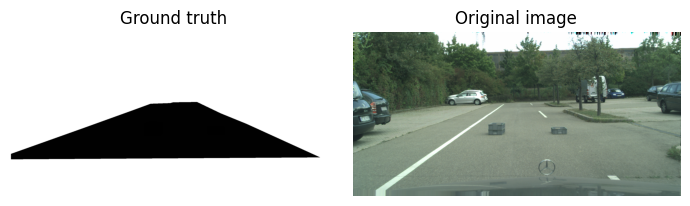

In [405]:
#Image preview
fig, ax = plt.subplots(1, 2, figsize=(7, 3))  # 1 row, 2 columns, and adjust the figure size as needed
# Display the mask
ax[0].imshow(original_gt)
ax[0].set_title('Ground truth')
ax[0].axis('off')  # Hide axes

# Display the image
ax[1].imshow(original_image)
ax[1].set_title('Original image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [406]:
def show_image(original_image, original_gt, fig_size = (12,8)):
    global use_dataset
    
    use_dataset = False
    original_image, original_gt = load_images(selected_file, use_dataset, selected_folder)
    contoured_image = plot.drawContours(original_image, original_gt, use_dataset)
    overlay_50 = plot.drawOverlay(0.5, original_image, original_gt, use_dataset)
    overlay_100 = plot.drawOverlay(1, original_image, original_gt, use_dataset)
    
    # Concatenate images horizontally (axis=1) or vertically (axis=0)
    first_row = np.concatenate((contoured_image, overlay_50, overlay_100), axis=1)


    use_dataset = True
    original_image, original_gt = load_images(selected_file, use_dataset, selected_folder)

    contoured_image = plot.drawContours(original_image, original_gt, use_dataset)
    overlay_50 = plot.drawOverlay(0.5, original_image, original_gt, use_dataset)
    overlay_100 = plot.drawOverlay(1, original_image, original_gt, use_dataset)

    second_row = np.concatenate((contoured_image, overlay_50, overlay_100), axis=1)

    # Stack the two rows vertically
    combined_image = np.concatenate((first_row, second_row), axis=0)
    
    # Display the combined image
    plt.figure(figsize=fig_size)
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Contours and Overlays')
    plt.show()

    display(image_selector_widget, model_selector_widget, folder_selector_widget)    

In [407]:
def on_folder_selected(change):
    global selected_folder
    selected_folder = change['new']
    print(f"Selected folder: {change['new']}")

    # Update the image selector options based on the selected folder
    image_selector_widget.options = plot.get_all_files(f'data/export/datasets/{selected_folder}/test/imgs/')


In [408]:
def on_file_selected(change):
    global selected_file
    selected_file = change['new']
    print(f"Selected file: {selected_file}")

    # Call your function with the selected file name here
    original_image,original_gt = load_images(selected_file, use_dataset, selected_folder)
    clear_output(wait=True)  # Clear the previous output
    show_image(original_image, original_gt)

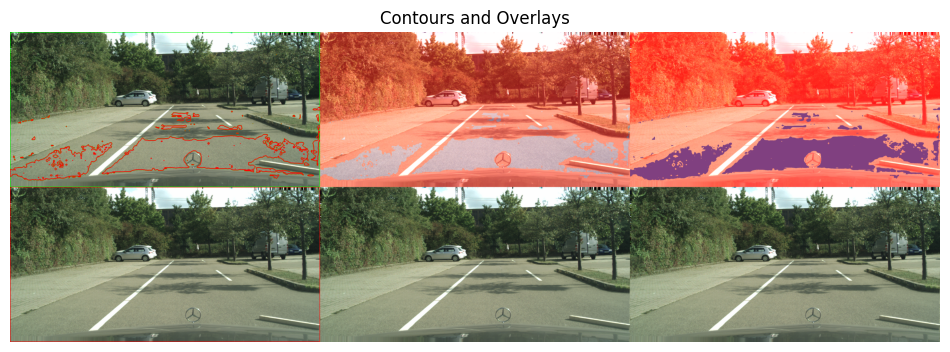

Dropdown(description='Choose file', options=('01_Hanns_Klemm_Str_45_000005_000230.png', '01_Hanns_Klemm_Str_45…

Dropdown(description='Choose model', options=('grood_logml_1000K_01adamw_tau10_resetthr1', 'grood_knn_e2e_city…

Dropdown(description='Choose folder', index=3, options=('RoadObstacles21', 'RoadAnomaly', 'RoadObstacles', 'Fi…

In [ ]:
folder_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/datasets/'),  # Call the folder-only function
    description='Choose folder',
    disabled=False,
)
folder_selector_widget.observe(on_folder_selected, names='value')

image_selector_widget = widgets.Dropdown(
    options=plot.get_all_files('data/export/datasets/' + selected_folder + '/test/imgs/'),
    description='Choose file',
    disabled=False,
)
image_selector_widget.observe(on_file_selected, names='value')

model_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/results/'),
    description='Choose model',
    disabled=False,
)
model_selector_widget.observe(on_file_selected, names='value')


show_image(original_image, original_gt)
